In [1]:
import pandas as pd
snow_csv = pd.read_csv('/content/Grand Forks_daily updated (1).csv')
snow_csv.info()
snow_csv.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3077 entries, 0 to 3076
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Time(CST)          3077 non-null   object 
 1   ST_10              3077 non-null   float64
 2   ST_50              3077 non-null   float64
 3   ST_100             3077 non-null   float64
 4   AvgAirTemp_C       3077 non-null   float64
 5   AvgRelHum_%        3077 non-null   float64
 6   AvgWindSpeed_m/s   3077 non-null   float64
 7   AvgWindDir_Deg     3077 non-null   float64
 8   TotalSolRad_MJ/m2  3077 non-null   float64
 9   Rainfall_mm        3077 non-null   float64
 10  SnowDepth_mm       3077 non-null   int64  
 11  SoilMoisture       3077 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 288.6+ KB


,0
Time(CST),0
ST_10,0
ST_50,0
ST_100,0
AvgAirTemp_C,0
AvgRelHum_%,0
AvgWindSpeed_m/s,0
AvgWindDir_Deg,0
TotalSolRad_MJ/m2,0
Rainfall_mm,0


In [2]:
snow_csv['Time(CST)'] = pd.to_datetime(snow_csv['Time(CST)'], format='%m/%d/%Y')
snow_filtered = snow_csv[snow_csv['Time(CST)'].dt.month.isin([10,11,12, 1, 2, 3])]
snow_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1609 entries, 0 to 3072
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Time(CST)          1609 non-null   datetime64[ns]
 1   ST_10              1609 non-null   float64       
 2   ST_50              1609 non-null   float64       
 3   ST_100             1609 non-null   float64       
 4   AvgAirTemp_C       1609 non-null   float64       
 5   AvgRelHum_%        1609 non-null   float64       
 6   AvgWindSpeed_m/s   1609 non-null   float64       
 7   AvgWindDir_Deg     1609 non-null   float64       
 8   TotalSolRad_MJ/m2  1609 non-null   float64       
 9   Rainfall_mm        1609 non-null   float64       
 10  SnowDepth_mm       1609 non-null   int64         
 11  SoilMoisture       1609 non-null   float64       
dtypes: datetime64[ns](1), float64(10), int64(1)
memory usage: 163.4 KB


In [3]:
snow_filtered.isnull().sum()

,0
Time(CST),0
ST_10,0
ST_50,0
ST_100,0
AvgAirTemp_C,0
AvgRelHum_%,0
AvgWindSpeed_m/s,0
AvgWindDir_Deg,0
TotalSolRad_MJ/m2,0
Rainfall_mm,0


In [4]:
snow_filtered.count()

,0
Time(CST),1609
ST_10,1609
ST_50,1609
ST_100,1609
AvgAirTemp_C,1609
AvgRelHum_%,1609
AvgWindSpeed_m/s,1609
AvgWindDir_Deg,1609
TotalSolRad_MJ/m2,1609
Rainfall_mm,1609


In [5]:
snow_filtered.isnull().count()
snow_filtered=snow_filtered.fillna(0)

In [6]:
train=snow_filtered.drop(['ST_50', 'ST_100', 'Time(CST)'], axis=1)
#Y=snow_filtered['ST_10']
train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1609 entries, 0 to 3072
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ST_10              1609 non-null   float64
 1   AvgAirTemp_C       1609 non-null   float64
 2   AvgRelHum_%        1609 non-null   float64
 3   AvgWindSpeed_m/s   1609 non-null   float64
 4   AvgWindDir_Deg     1609 non-null   float64
 5   TotalSolRad_MJ/m2  1609 non-null   float64
 6   Rainfall_mm        1609 non-null   float64
 7   SnowDepth_mm       1609 non-null   int64  
 8   SoilMoisture       1609 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 125.7 KB


<Axes: >

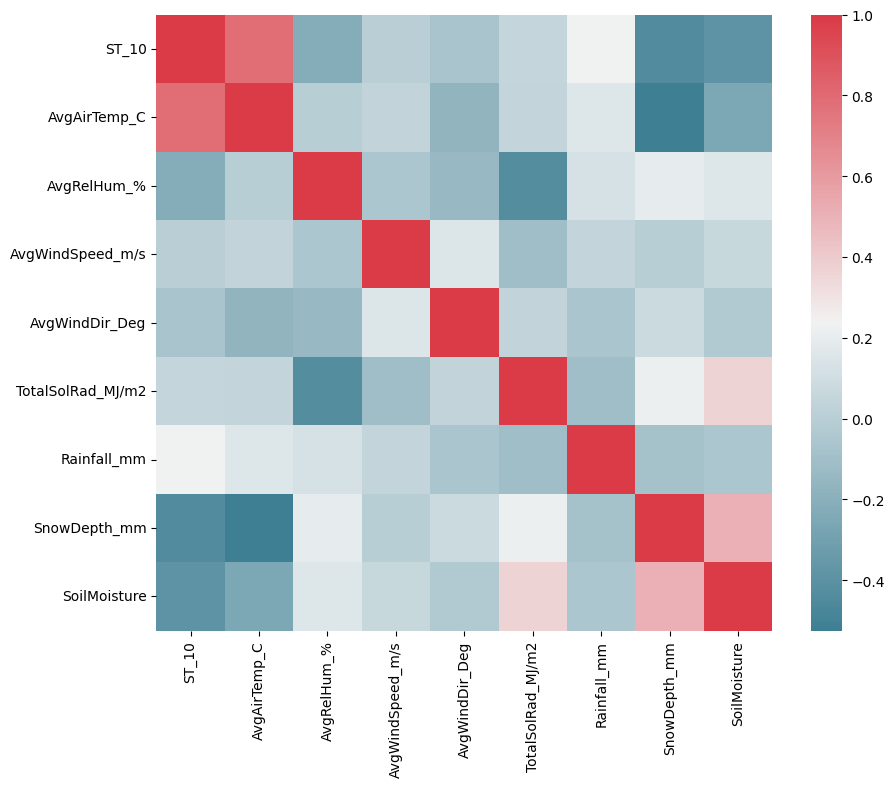

In [7]:
import matplotlib.pyplot as plt
import numpy as np

f, ax = plt.subplots(figsize=(10, 8))
corr = train.corr()
import seaborn as sns
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Scalable=[ 'AvgAirTemp_C', 'AvgRelHum_%', 'AvgWindSpeed_m/s', 'AvgWindDir_Deg', 'TotalSolRad_MJ/m2', 'Rainfall_mm', 'SnowDepth_mm', 'SoilMoisture']

train[Scalable] = scaler.fit_transform(train[Scalable])

In [9]:
X=train.drop(['ST_10'], axis=1)
Y=train['ST_10']

In [10]:

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=52)
#X_train.info()

In [11]:
!pip install xanfis

In [12]:
import xanfis

In [13]:
from xanfis import GdAnfisRegressor

Use Trapezoidial, Triangular, *Gaussian* for mf_class. Play around with optimizers, epochs, and batch size. Learn about what is Neuro Fuzzy Logic.
[Kera Website](https://keras.io/api/optimizers/)

In [14]:
model = GdAnfisRegressor(num_rules=20, mf_class="Trapezoidal",
                          act_output=None, vanishing_strategy="blend", reg_lambda=None,
                          epochs=100, batch_size=8, optim="Adafactor", optim_params={"lr": 0.01},
                          early_stopping=False, n_patience=10, epsilon=0.001, valid_rate=0.1,
                          seed=42, verbose=True)
## Train the model
model.fit(X_train.values,Y_train.values)

Epoch: 1, Train Loss: 17.737198, Validation Loss: 12.092716
Epoch: 2, Train Loss: 17.697602, Validation Loss: 12.086347
Epoch: 3, Train Loss: 17.629060, Validation Loss: 12.073785
Epoch: 4, Train Loss: 17.622743, Validation Loss: 12.047405
Epoch: 5, Train Loss: 17.571357, Validation Loss: 11.984166
Epoch: 6, Train Loss: 17.485428, Validation Loss: 11.845505
Epoch: 7, Train Loss: 17.196431, Validation Loss: 11.582346
Epoch: 8, Train Loss: 16.680815, Validation Loss: 10.999043
Epoch: 9, Train Loss: 15.577179, Validation Loss: 9.936237
Epoch: 10, Train Loss: 13.802802, Validation Loss: 8.350428
Epoch: 11, Train Loss: 11.331571, Validation Loss: 6.602142
Epoch: 12, Train Loss: 8.876054, Validation Loss: 5.357396
Epoch: 13, Train Loss: 6.976705, Validation Loss: 4.841417
Epoch: 14, Train Loss: 5.906099, Validation Loss: 4.452857
Epoch: 15, Train Loss: 5.211748, Validation Loss: 4.282692
Epoch: 16, Train Loss: 4.774184, Validation Loss: 4.213146
Epoch: 17, Train Loss: 4.430911, Validation Lo

GdAnfisRegressor(batch_size=8, device='cpu', early_stopping=False, epochs=100,
                 mf_class='Trapezoidal', num_rules=20, optim='Adafactor',
                 optim_params={'lr': 0.01}, reg_lambda=0.0,
                 vanishing_strategy='blend')

In [15]:
model_pred = model.predict(X_test.values)
import sklearn
import math
mse = sklearn.metrics.mean_squared_error(Y_test.values,model_pred)
rmse = math.sqrt(mse)
rmse


1.527964957266906

In [16]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rf = RandomForestRegressor(
    n_estimators=100,
    criterion='squared_error',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=-1,
    random_state=1,
    verbose=0,
    warm_start=False,
    ccp_alpha=0.0,
    max_samples=None,
    monotonic_cst=None,
    )

rf.fit(X_train, Y_train)
rf_pred = rf.predict(X_test)

In [17]:
import sklearn
import math
mse = sklearn.metrics.mean_squared_error(Y_test,rf_pred)
rmse = math.sqrt(mse)
rmse

1.3029730467772411

In [18]:
import xgboost

xgboost_model = xgboost.XGBRegressor(n_estimators=200, learning_rate=0.05, gamma=1, subsample=0.75,
                           colsample_bytree=0.7, max_depth=5)
xg=xgboost_model.fit(X_train,Y_train)
y_pred=xg.predict(X_test)

In [19]:
import sklearn
import math
mse = sklearn.metrics.mean_squared_error(Y_test,y_pred)
rmse = math.sqrt(mse)
rmse

1.2011453370583445

In [20]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
lr.fit(X_train, Y_train)
lr_pred = lr.predict(X_test)

In [21]:
import sklearn
import math
mse = sklearn.metrics.mean_squared_error(Y_test,lr_pred)
rmse = math.sqrt(mse)
rmse

2.2248240982943353

In [22]:
!pip install xanfis

Work on reducing the rmse value aswell

First try to handle the missing values then understanding and working on the FuzzyLogic model